In [1]:
import os

In [2]:
os.getcwd()

'/content'

In [3]:
os.chdir('/content/drive/MyDrive/pdsassignment3')

In [4]:
os.getcwd()

'/content/drive/MyDrive/pdsassignment3'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('rawdata/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
np.random.seed(99)

In [10]:
sample_data = data.sample(n=25)

In [11]:
sample_mean = sample_data['Glucose'].mean()
sample_max = sample_data['Glucose'].max()

In [13]:
print(' Mean Glucose:', sample_mean)
print(' Max Glucose:', sample_max)

 Mean Glucose: 124.96
 Max Glucose: 196


In [14]:
population_mean = data['Glucose'].mean()
population_max = data['Glucose'].max()

In [15]:
print('Population stats Mean Glucose:', population_mean)
print('Population stats Max Glucose:', population_max)

Population stats Mean Glucose: 120.89453125
Population stats Max Glucose: 199


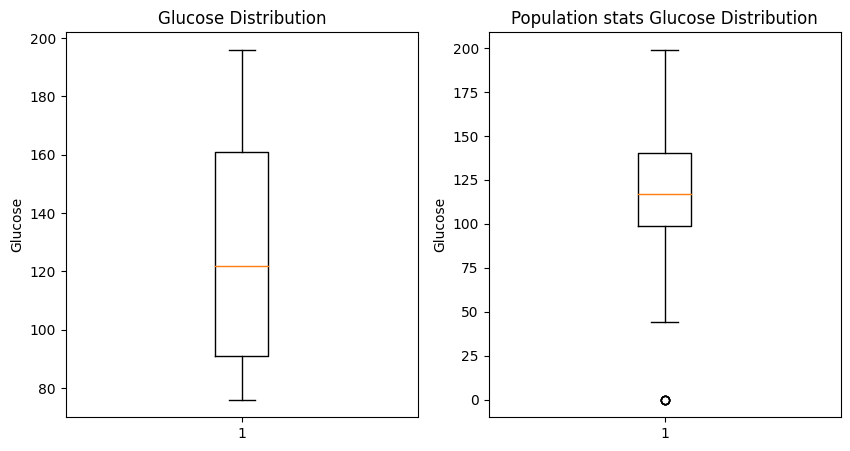

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(sample_data['Glucose'])
axs[0].set_title('Glucose Distribution')
axs[0].set_ylabel('Glucose')
axs[1].boxplot(data['Glucose'])
axs[1].set_title('Population stats Glucose Distribution')
axs[1].set_ylabel('Glucose')
plt.savefig('results/visualization_1.png')
plt.show()

In [19]:
sample_bmi_98 = np.percentile(sample_data['BMI'], 98)
population_bmi_98 = np.percentile(data['BMI'], 98)

In [20]:
print('Sample 98th Percentile BMI:', sample_bmi_98)
print('Population stats 98th Percentile BMI:' , population_bmi_98)

Sample 98th Percentile BMI: 52.408
Population stats 98th Percentile BMI: 47.52599999999996


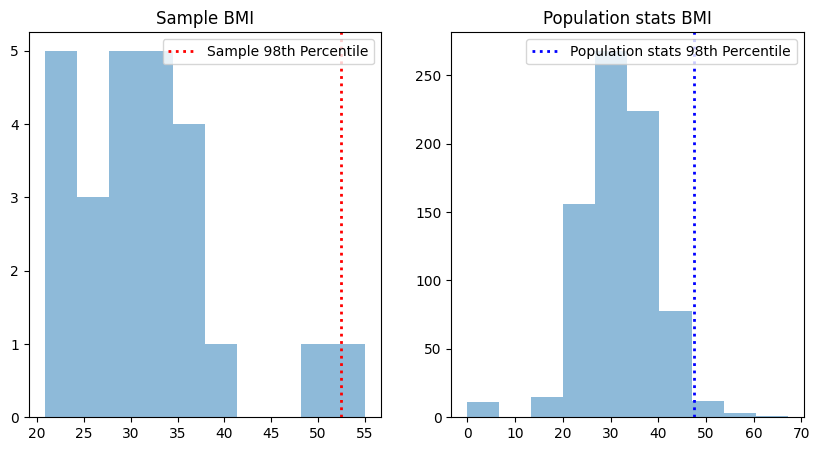

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Sample BMI')
plt.hist(sample_data['BMI'], bins=10, alpha=0.5)
plt.axvline(sample_bmi_98, color='red', linestyle='dotted', linewidth=2, label='Sample 98th Percentile')
plt.legend()
plt.subplot(1,2,2)
plt.title('Population stats BMI')
plt.hist(data['BMI'], bins=10, alpha=0.5)
plt.axvline(population_bmi_98, color='blue', linestyle='dotted', linewidth=2, label='Population stats 98th Percentile')
plt.savefig('results/visualization_2.png')
plt.legend()
plt.show()


In [25]:
n_samples = 500
sample_means = np.zeros(n_samples)
sample_stds = np.zeros(n_samples)
sample_percentiles = np.zeros(n_samples)

In [26]:
def percentile(x):
  return np.percentile(bootstrap_sample['BloodPressure'], q=x)

In [37]:
y=int(input())
n_obs = len(data)
for i in range(n_samples):
    bootstrap_sample = data.sample(n=150, replace=True)
    sample_means[i] = bootstrap_sample['BloodPressure'].mean()
    sample_stds[i] = bootstrap_sample['BloodPressure'].std()
    sample_percentiles[i] = percentile(y)
pop_mean = data['BloodPressure'].mean()
pop_std = data['BloodPressure'].std()
pop_percentile = percentile(y)

50


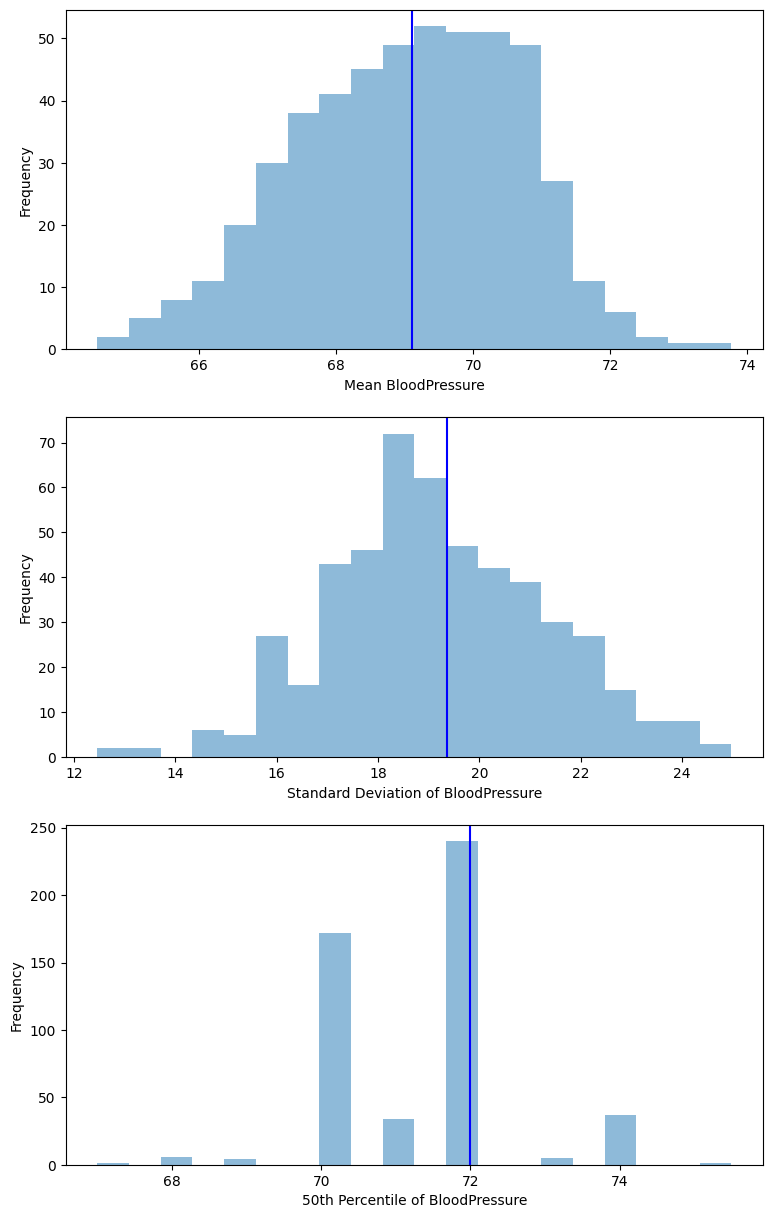

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(9, 15))
axes[0].hist(sample_means, bins=20, alpha=0.5)
axes[0].axvline(x=pop_mean, color='blue')
axes[0].set_xlabel('Mean BloodPressure')
axes[0].set_ylabel('Frequency')

axes[1].hist(sample_stds, bins=20, alpha=0.5)
axes[1].axvline(x=pop_std, color='blue')
axes[1].set_xlabel('Standard Deviation of BloodPressure')
axes[1].set_ylabel('Frequency')

axes[2].hist(sample_percentiles, bins=20, alpha=0.5)
axes[2].axvline(x=pop_percentile, color='blue')
axes[2].set_xlabel(f'{y}th Percentile of BloodPressure')
axes[2].set_ylabel('Frequency')

plt.savefig('results/visualization_3.png')
plt.show()